In [14]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",sep=";")
df=df.dropna(axis=0,how='any')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.00,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.00,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C


In [15]:
d={'Survived':{'No':0,'Yes':1}}
df.replace(d,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
19,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
26,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
863,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
865,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
875,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [16]:
d={'Sex':{'male':0,'female':1}}
df.replace(d,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,0,1,"Widener, Mr. Harry Elkins",0,27.0,0,2,113503,211.5000,C82,C
19,225,1,1,"Hoyt, Mr. Frederick Maxfield",0,38.0,1,0,19943,90.0000,C93,S
26,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",0,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,1,2,"Becker, Miss. Marion Louise",1,4.0,2,1,230136,39.0000,F4,S
863,858,1,1,"Daly, Mr. Peter Denis",0,51.0,0,0,113055,26.5500,E17,S
865,196,1,1,"Lurette, Miss. Elise",1,58.0,0,0,PC 17569,146.5208,B80,C
875,463,0,1,"Gee, Mr. Arthur H",0,47.0,0,0,111320,38.5000,E63,S


In [17]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df[['Pclass', 'Age','Parch']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.70


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

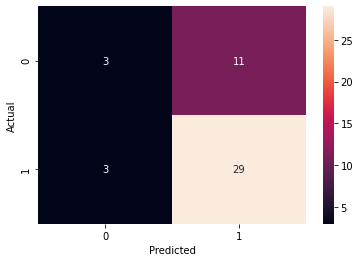

In [18]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.642


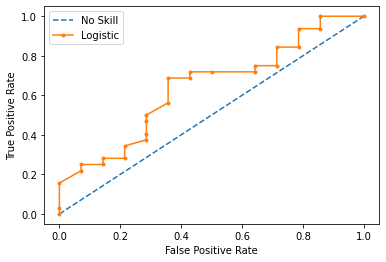

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
lr_probs = logreg.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

AUC-ROC helps us visualize how well our machine learning classifier is performing. but it only works on binary problems 